In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=30

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/PotatoDisease/data',
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=(BATCH_SIZE)
    
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

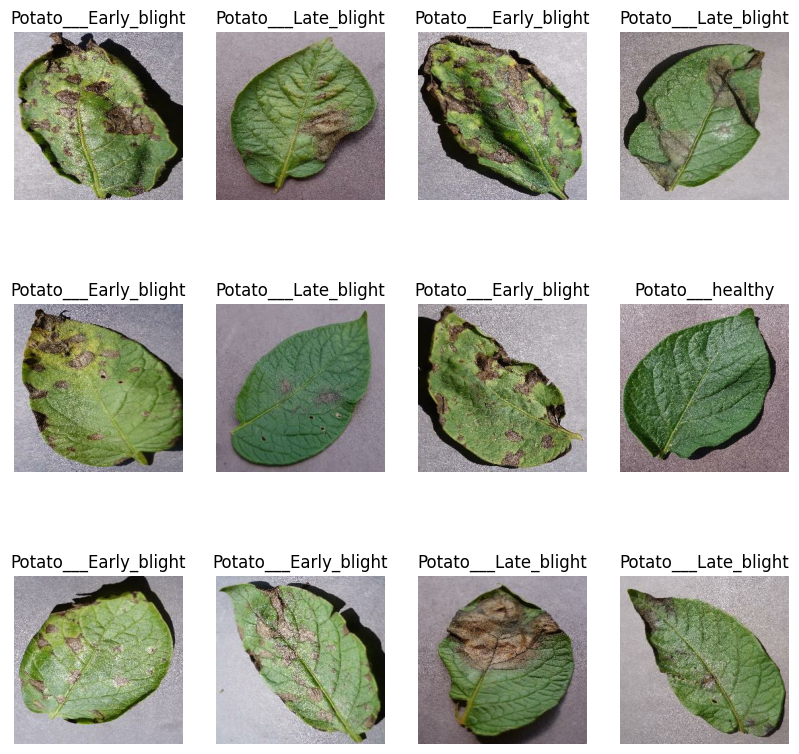

In [6]:
#Display The Random Images
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
dataset
len(dataset)

68

In [8]:
# 80% ==> traning
# 20%==> 10% validation, 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [10]:
train_ds = dataset.take(54)
len(train_ds)

54

In [11]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [12]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [13]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [14]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [15]:
def get_dataset_partitions_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return(train_ds,val_ds,test_ds)

In [16]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [17]:
len(train_ds)

54

In [18]:
len(val_ds)

6

In [19]:
len(test_ds)

8

In [20]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
resize_and_rescale= tf.keras.Sequential([
   tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
   tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)])

In [22]:
data_agumentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])

In [23]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_agumentation,
    layers.Conv2D(32,(3,3),activation='relu', input_shape=input_shape ),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/30
54/54 [==============================] - 176s 3s/step - loss: 0.9342 - accuracy: 0.4826 - val_loss: 0.8402 - val_accuracy: 0.4792
Epoch 2/30
54/54 [==============================] - 157s 3s/step - loss: 0.7307 - accuracy: 0.6476 - val_loss: 0.4498 - val_accuracy: 0.8438
Epoch 3/30
54/54 [==============================] - 157s 3s/step - loss: 0.5402 - accuracy: 0.7778 - val_loss: 0.4156 - val_accuracy: 0.7969
Epoch 4/30
54/54 [==============================] - 161s 3s/step - loss: 0.3053 - accuracy: 0.8802 - val_loss: 0.2914 - val_accuracy: 0.8906
Epoch 5/30
54/54 [==============================] - 228s 4s/step - loss: 0.3335 - accuracy: 0.8762 - val_loss: 0.2804 - val_accuracy: 0.8854
Epoch 6/30
54/54 [==============================] - 223s 4s/step - loss: 0.1798 - accuracy: 0.9363 - val_loss: 0.0591 - val_accuracy: 0.9688
Epoch 7/30
54/54 [==============================] - 218s 4s/step - loss: 0.1672 - accuracy: 0.9404 - val_loss: 0.1024 - val_accuracy: 0.9688
Epoch 8/30
54

In [27]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 9s 706ms/step - loss: 0.0631 - accuracy: 0.9805


In [28]:
scores

[0.06308001279830933, 0.98046875]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 54}

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [32]:
history.history['accuracy']

[0.4826388955116272,
 0.6475694179534912,
 0.7777777910232544,
 0.8802083134651184,
 0.8761574029922485,
 0.9363425970077515,
 0.9403935074806213,
 0.9548611044883728,
 0.9606481194496155,
 0.9612268805503845,
 0.9699074029922485,
 0.9635416865348816,
 0.9629629850387573,
 0.9756944179534912,
 0.9710648059844971,
 0.9762731194496155,
 0.9716435074806213,
 0.9826388955116272,
 0.9646990895271301,
 0.9826388955116272,
 0.9832175970077515,
 0.9745370149612427,
 0.9895833134651184,
 0.9675925970077515,
 0.9861111044883728,
 0.9809027910232544,
 0.9849537014961243,
 0.9212962985038757,
 0.984375,
 0.9791666865348816]

In [33]:
#Stored Array in a variables
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

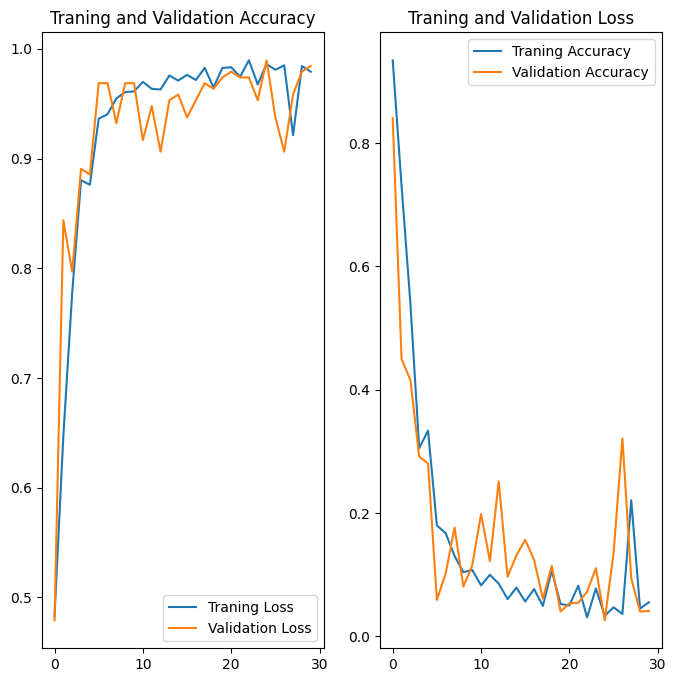

In [34]:
# Plot the Graph of traning and validation accuracy
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS),acc,label='Traning Loss')
plt.plot(range(EPOCHS),val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Traning and Validation Accuracy')

#loss Chart

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS),loss,label='Traning Accuracy')
plt.plot(range(EPOCHS),val_loss, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Traning and Validation Loss')
plt.show()

In [35]:
import numpy as np

First Image to Predict
First Image's actual label Potato___Late_blight
1/1 [==============================] - 1s 1s/step
predication label Potato___Late_blight


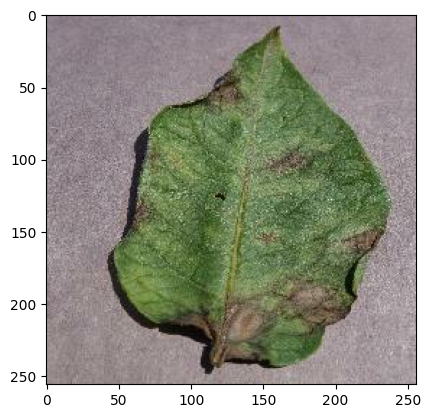

In [36]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    
    print("First Image to Predict")
    plt.imshow(first_image)
    print("First Image's actual label",class_names[first_label])
    
    batch_predication = model.predict(image_batch)
    print("predication label",class_names[np.argmax(batch_predication[0])])

In [37]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) #crreate batch
    
    predications = model.predict(img_array)
    
    predict_class = class_names[np.argmax(predications[0])]
    confidance = round(100 * (np.max(predications)),2)
    return predict_class, confidance

1/1 [==============================] - 0s 86ms/step


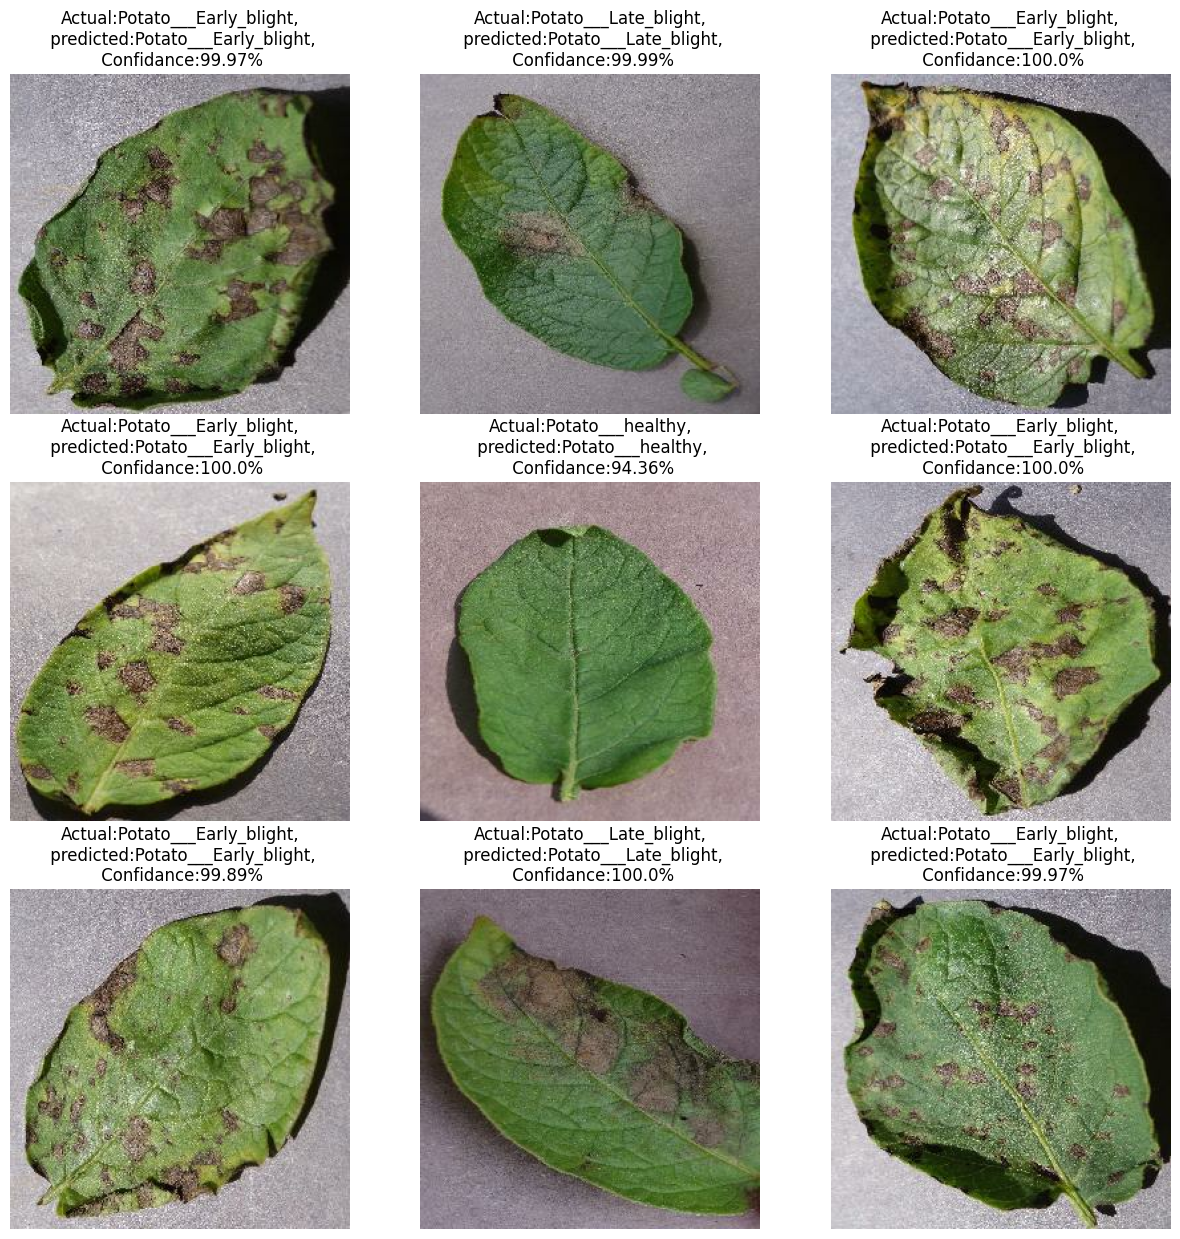

In [38]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class,confidance = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual:{actual_class},\n predicted:{predicted_class},\n Confidance:{confidance}%")
        plt.axis("off")

In [39]:
import os
model_version=max([int(i) for i in os.listdir("D:/PotatoDisease/models") + [0]])+1
model.save(f"D:/PotatoDisease/models/{model_version}")

INFO:tensorflow:Assets written to: D:/PotatoDisease/models/3\assets


INFO:tensorflow:Assets written to: D:/PotatoDisease/models/3\assets


In [40]:
#model_path = "D:/PotatoDisease/potato.h5"

In [41]:
#model.save(model_path)